In [3]:
from __future__ import division, print_function

from IPython.core.display import Image

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

PATH = 'assets/images/'

# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) MLE
Week 8 | 1.3

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Describe what the MLE is
- Understand the calculation of the MLE
- Explain how the MLE is used to evaluate different models

## We've run into a number of models where we said this is solved via the MLE or Maximum Likelihood Estimate

## But what exactly is that?

## What do we even mean by likelihood?

## What is the difference between probability and likelihood?

## Probability is chance of observing our data given the true population parameters

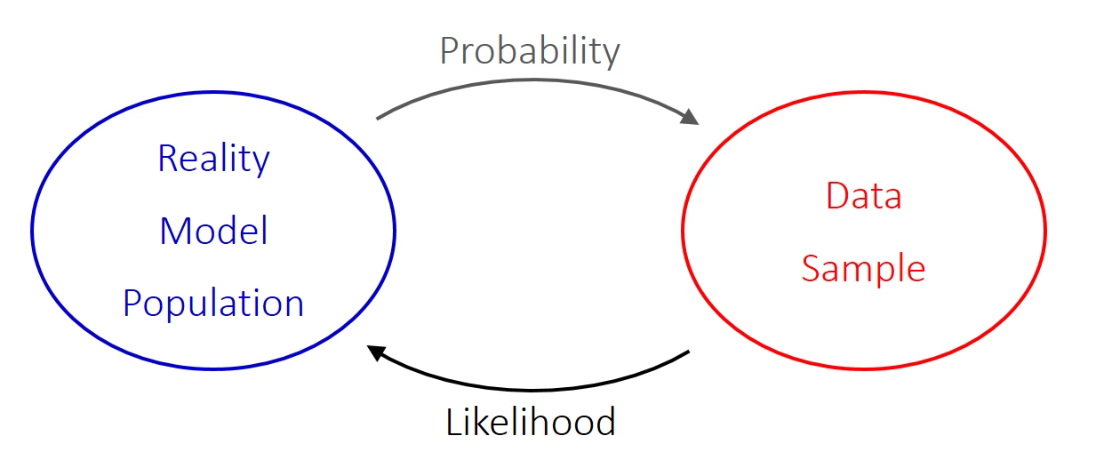

In [4]:
Image(PATH + 'likelihood.png')

## Likelihood says that given our observed data what is the chance a given model is true?

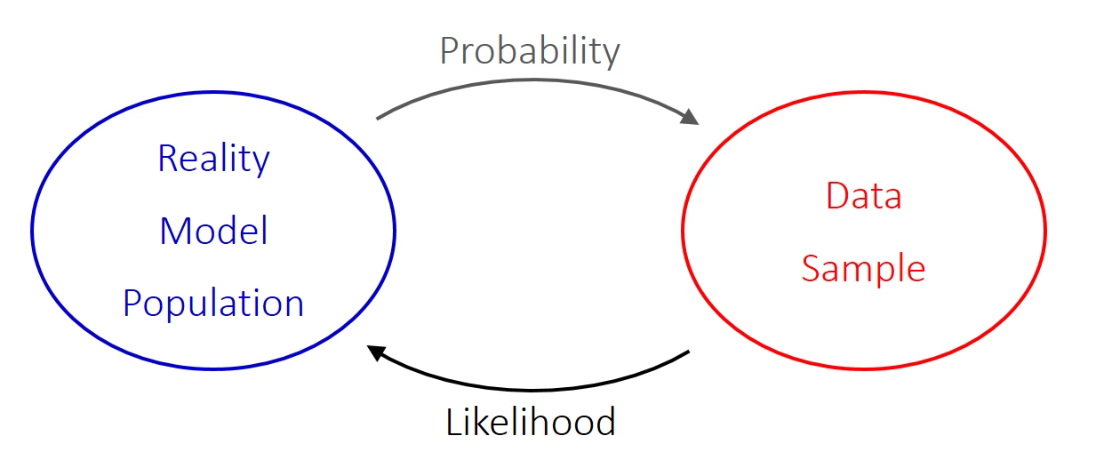

In [5]:
Image(PATH + 'likelihood.png')

## Example probability problem:

Given that we have a fair coin, what is the probability of observing 65 heads out of 100 flips?

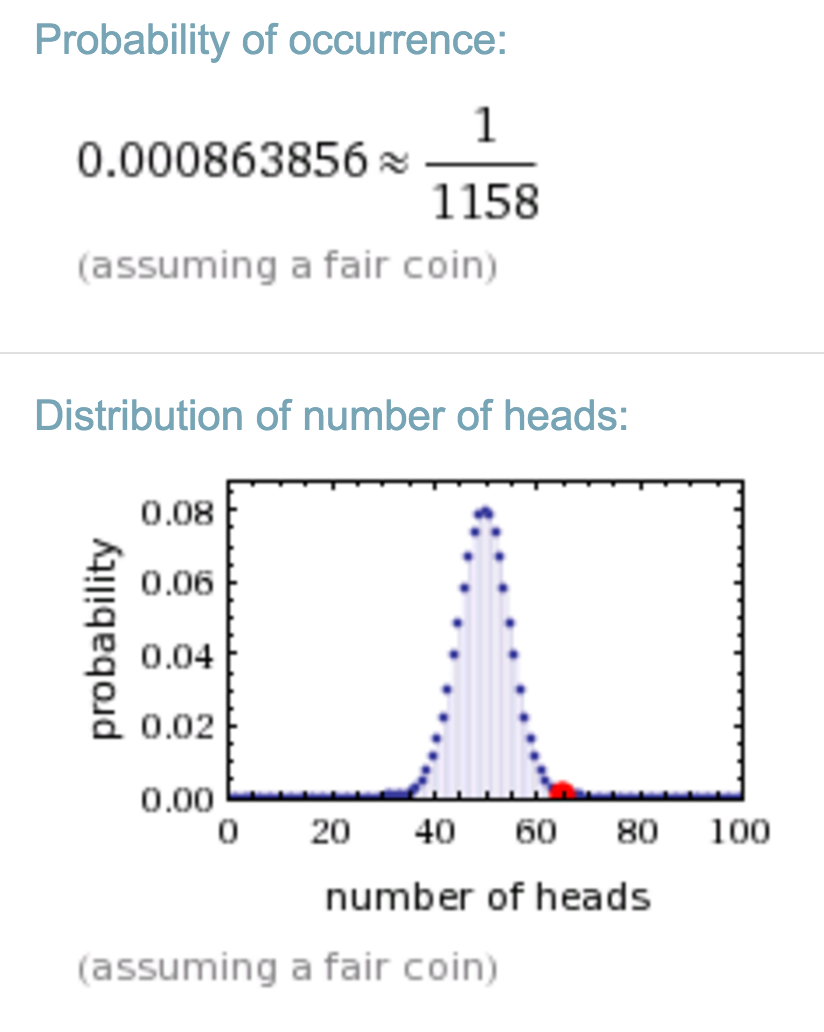

In [6]:
Image(PATH + 'coins.png', width=500)

## Example Likelihood Problem:

Given we have observed 65 heads in 100 coin flips, what is the likelihood we have a fair coin?

## So, by maximizing the likelihood, we are attempting to find the model (parameters) that best fits our observed data

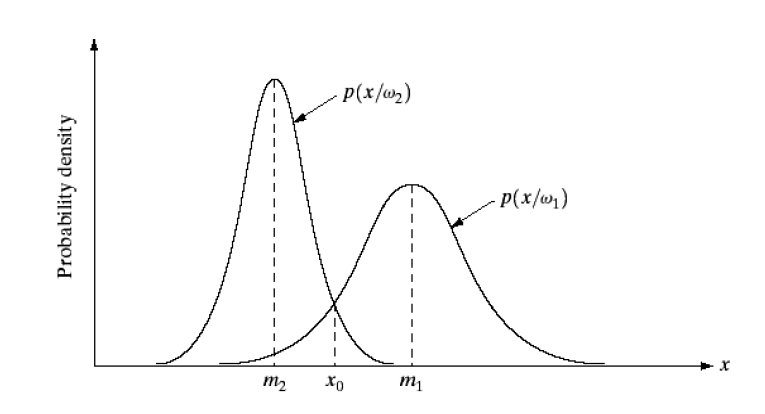

In [7]:
Image(PATH + 'probs.png', width=500)

## So we want to calculate the probability of observing our data under a given $\theta$

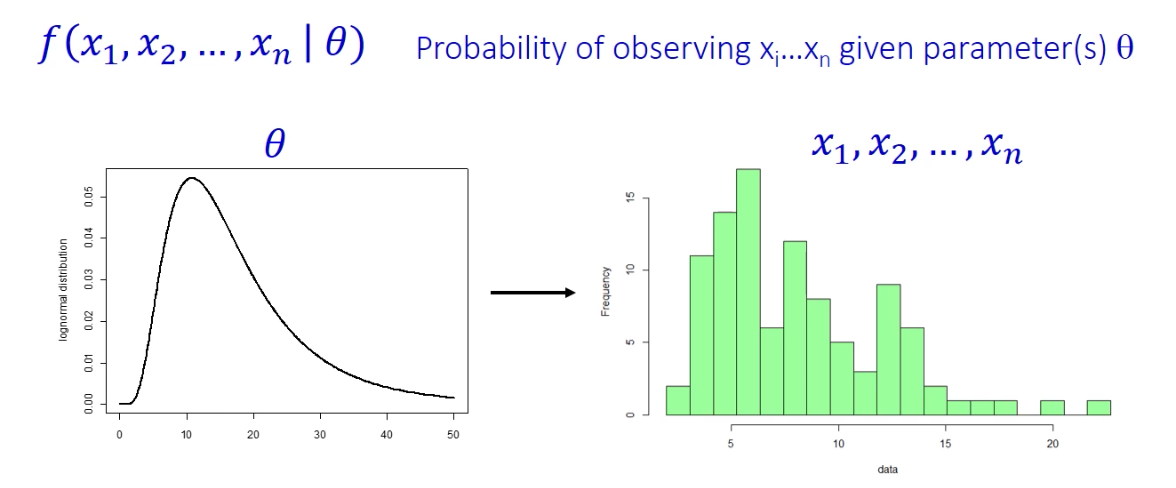

In [8]:
Image(PATH + 'function.png')

## Notice that this is a joint probablity for all $x_i$

## Remember how we get the joint probability for independent events

## $f(x_1|\theta) \cdot f(x_2|\theta) \cdot f(x_2|\theta)...f(x_n|\theta)$

## or,    $\prod f(x_i|\theta)$

## So then, our likelihood function is just $L(\theta|x_i) = \prod f(x_i|\theta)$

## Let's now do that for the Bernoulli distribution

## Let's solve our problem for the coin

$f(x_i|P) = P^{x_i}(1-P)^{1-x_i}$ <br><br> $x_i=\begin{cases} 1, heads \\ 0, tails \\ \end{cases}$

## Calculate this for a single head

## This gives us the likelihood

$L = \prod P^{x_i}(1-P)^{1-x_i}$

## Now how do we maximize the likelihood?

## We take the derivative and set it equal to 0

## But since it is a bunch of products, it is not fun to do 

## So like all good mathematicians, we get lazy and use the log

$log(L) = log(\prod P^{x_i}(1-P)^{1-x_i})$

$\sum log( P^{x_i}(1-P)^{1-x_i} )$<br><br>
$\sum x_i log(P) + (1-x_i) log(1-p)$<br><br>
until eventually we get to the point we can differentiate by setting the terms equal to zero
<br><br>
until eventually we get that our estimated parameter, P, is equal to $\bar{x}$



## So you are telling me that we did all that to find out that the MLE of P is just the mean of X?

## Yep.

## So the MLE of P is .65

## So why bother?

## Well we can use this to compare candidate models

## We do this by comparing these candidate models "divergence" from our ideal model

## Recall the AIC - The Akaike Information Criterion

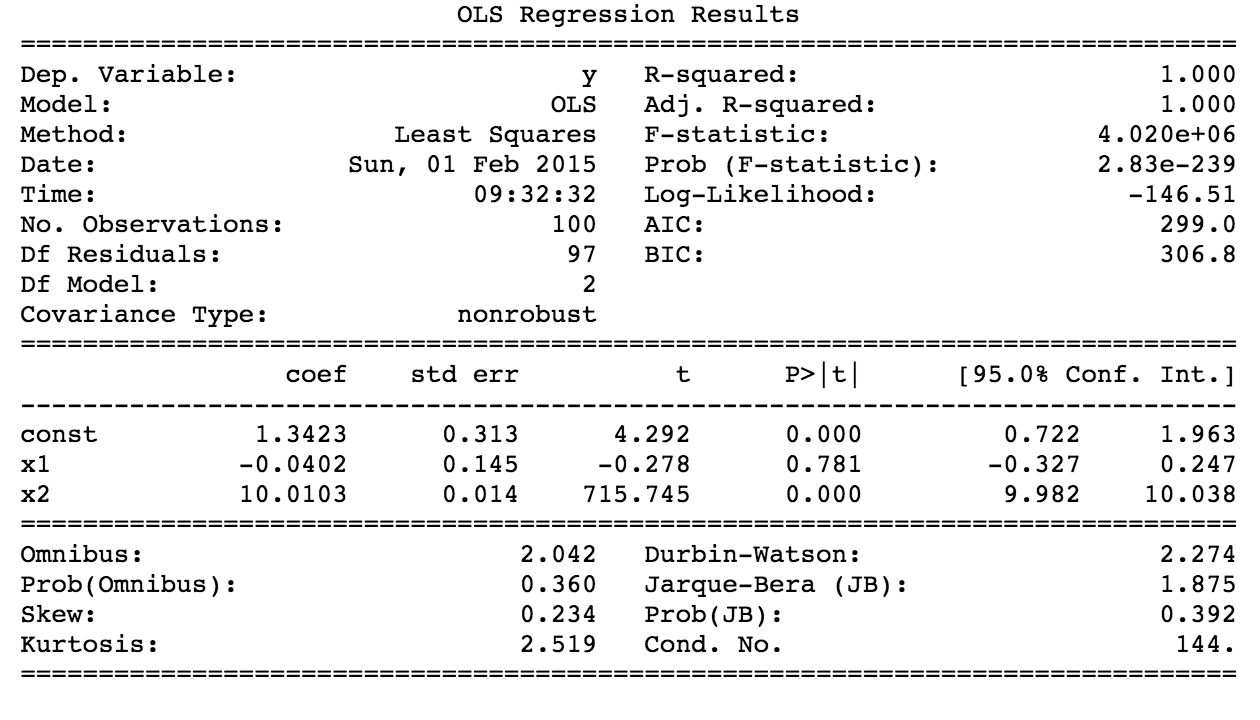

In [9]:
Image(PATH + 'aic.png', width=600)

## The AIC uses log likelihood to compare different models

## $ AIC = -2 \cdot ln[(\hat{\theta}|x)] + 2K$

<br><br>

Where K = the number of parameters

## What is a better AIC score - highly positive or negative?

### Given a set of candidate models for the data, the preferred model is the one with the minimum AIC value. 
### AIC rewards goodness of fit (as assessed by the likelihood function), but it also includes a penalty that is an increasing function of the number of estimated parameters. 

## Given this equation, what is the effect of adding additional parameters?

## Independent practice

Constuct a model of your choice with a dataset of your choice using a couple of methods. Compare the AIC score for the models.

In [86]:
import pandas as pd
import numpy as np

df = pd.read_csv("auto.csv")
print(df.shape)
df = df.drop(df[df.horsepower == '?'].index,axis=0)
df.horsepower = df.horsepower.apply(int)
y = df.mpg
X = df.ix[:,1:-1]
df.shape



(397, 9)


(392, 9)

In [90]:
df.columns

Index([u'mpg', u'cylinders', u'displacement', u'horsepower', u'weight',
       u'acceleration', u'year', u'origin', u'name'],
      dtype='object')

In [89]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
X = sm.add_constant(X) 
results = smf.ols('mpg ~ horsepower', data=df).fit()

# Inspect the results
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 28 Nov 2016   Prob (F-statistic):           7.03e-81
Time:                        14:31:04   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.0

In [91]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
X = sm.add_constant(X) 
results = smf.ols('mpg ~ horsepower + weight', data=df).fit()

# Inspect the results
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     467.9
Date:                Mon, 28 Nov 2016   Prob (F-statistic):          3.06e-104
Time:                        14:31:46   Log-Likelihood:                -1121.0
No. Observations:                 392   AIC:                             2248.
Df Residuals:                     389   BIC:                             2260.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     45.6402      0.793     57.540      0.0

In [93]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
X = sm.add_constant(X) 
results = smf.ols('mpg ~ horsepower + I(horsepower**2)', data=df).fit()

# Inspect the results
print results.summary()

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Mon, 28 Nov 2016   Prob (F-statistic):           5.40e-99
Time:                        14:32:48   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept             56.9001      1